## Objective

In [1]:
#Importing modules
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os

data=pd.read_csv('Breast Cancer Wisconsin Data Set.csv')

Next, we check the data by looking for the features, its shape . 

In [2]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
data.shape

(569, 33)

As we will not need 'id' and 'Unnamed: 32', we drop these two columns.

In [5]:
data=data.drop(['id','Unnamed: 32'], axis=1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Next, we check the distribution and statistics of data. As, can be observed many features have large varying scales.

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Surprisingly, this dataset doesn't have missing data. Cool! 

In [7]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

As disgnosis is our target variable, we check for the number of malignant and benign cases here.

No. of malignant cases:  357
No. of benign cases:  212


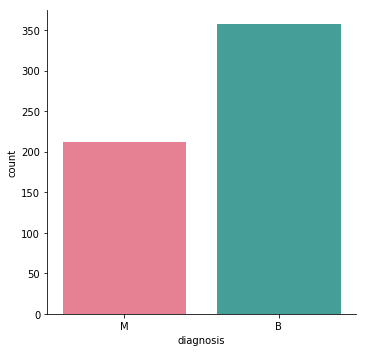

In [8]:
M,B=data['diagnosis'].value_counts()
print('No. of malignant cases: ' ,M)
print('No. of benign cases: ' ,B)
sns.catplot(x='diagnosis',kind='count',data=data, palette="husl")

Next, we make separate dataframes for malignant and benign cases (that will  be used for plotting purposes).

In [9]:
M=data.loc[data['diagnosis']=='M',:]
M.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
B=data.loc[data['diagnosis']=='B',:]
B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [11]:
M=M.drop(['diagnosis'],axis=1)
B=B.drop(['diagnosis'],axis=1)

### Plots
Next we make some Kernel Density Estimation (KDE) plots to check the distribution of malignant and benign cases for various features.

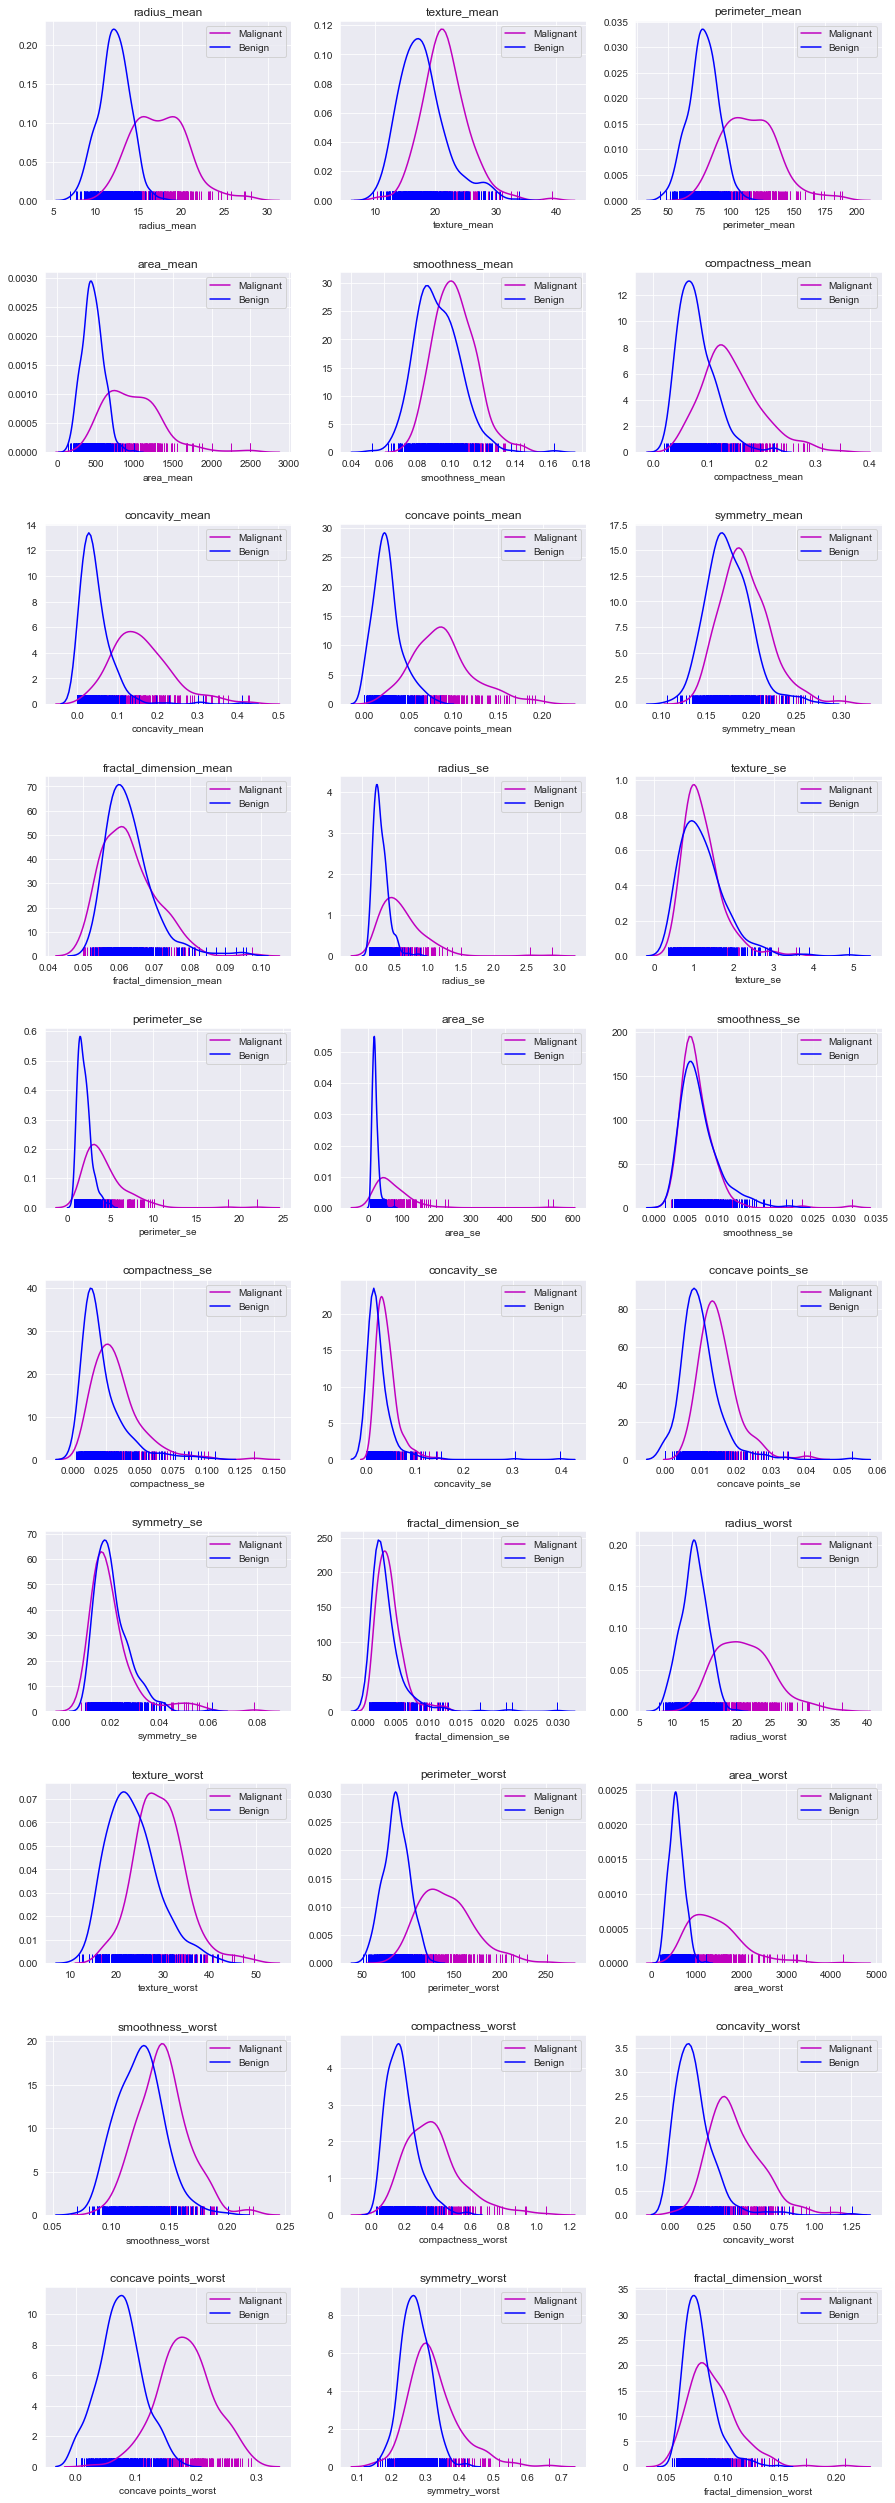

In [12]:
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in M.columns:
    i+=1
    plt.subplot(10,3,i)
    # first (0th) column of M is diagnosis, non-numerical
    sns.distplot(M[col],color='m',label='Malignant',hist=False, rug=True)
    sns.distplot(B[col],color='b',label='Benign',hist=False, rug=True)
    plt.legend(loc='right-upper')
    plt.title(col)
        

From kde plots, it appears that radius_mean, perimeter_mean, area_mean, concavity_mean, concave_points_mean, compactness_mean, radius_worst, texture_worst, perimeter_worst, area_worst, concavity_worst, concave points_worst, compactness_worst show more difference between malignant and benign populations compared to others. Another way to check these differences can be by using boxplots.

Next, we explore if and how these features are corrleted to one another. This is done using heatmap (as shown below). 

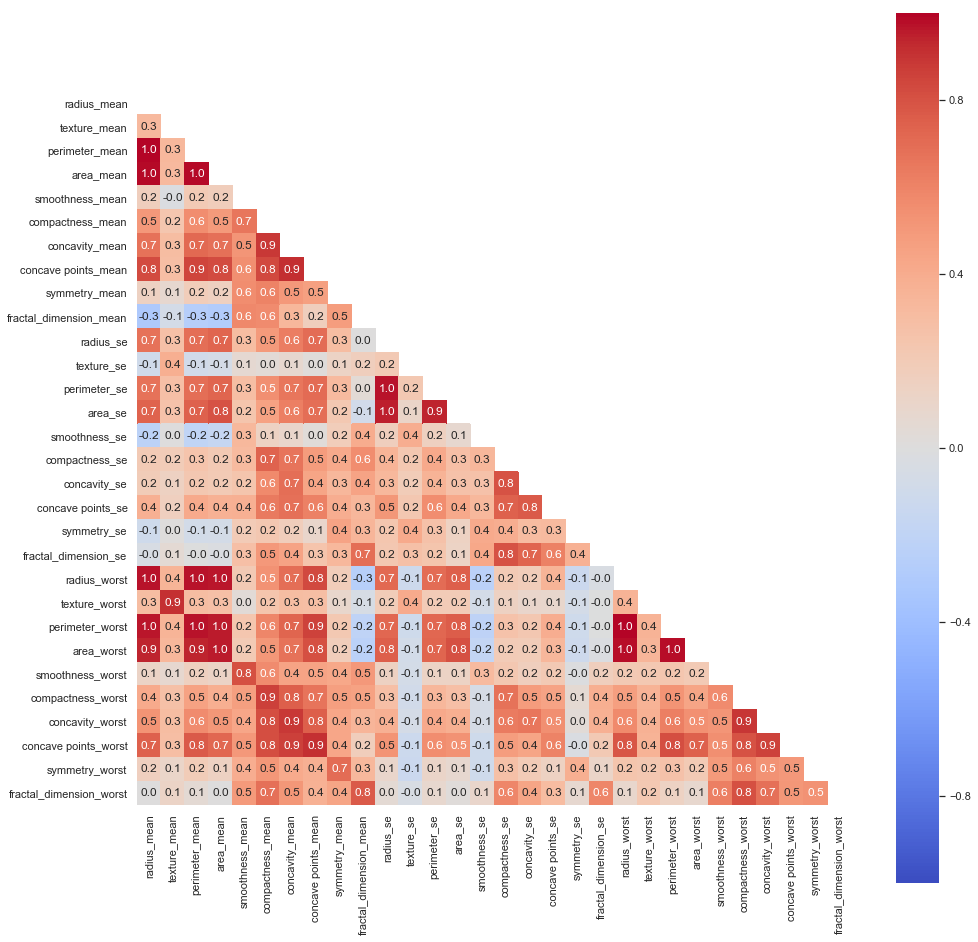

In [13]:
sns.set(style="white")
fig,ax=plt.subplots(figsize=(16,16))
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmin=-1,vmax=1,fmt = ".1f",annot=True,cmap="coolwarm", mask=mask, square=True)

As expected some of the features show complete correlation such as radius_mean, area_mean, perimeter_mean, radius_worst, area_worst and perimeter_worst. Also, texture_mean and texture_worst are correlated. concave points_mean and concavity_mean are very strongly correlated. radius_se, perimeter_se and area_se are strongly correlated. compactness_mean is correlated to concavity_mean, compactness_worst.

In order to avoid high variance that can appear due to many correlated features, we drop some of the very highly correlated features. For example- we have dropped here  area_mean, perimeter_mean, radius_worst, area_worst and perimeter_worst while we kept radius_mean. The drop in shape is also checked here.  Also, we code Malignant and Benign cases with numbers- 1 and 0 respectively.

In [14]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data=data.drop(['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'perimeter_worst','texture_worst','concavity_mean','perimeter_se', 'area_se'],axis=1)
print(data.shape)

(569, 22)


### Building model
Before starting with bulding our model, we make test and train sets.

In [15]:
y=data['diagnosis'].values
X=data.drop(['diagnosis'],axis=1).values

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8)

Before building model one thing that we must work on is to reduce or select the number of features. For this we will use Principal Component Analysis (PCA). PCA is an approach to obtain a few number of features from a large set. This aids in dimensionality reduction which can otherwise lead to high variance. Before performing PCA, it is crucial to standardize predictors to ensure all features are on the same scale. Otherwise, features that have high variance will influence the outcome of PCA. Here, we first use `StandardScaler` followed by PCA. Instead of arbitrarily choosing the number of dimension, we choose the number of dimensions that can explain most of the variance (usually 95% of the variance). To do that, we plot 'cumulative explained variance' vs 'number of components'. From this it seems that most of the variance can be explained by 10 components. So, we proceed with that number for PCA.

(0, 22)

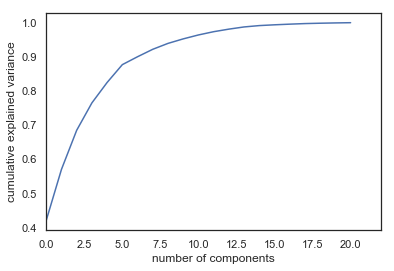

In [16]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,22,2)

In [17]:
pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 10)
(171, 10)


We begin our best model search by starting with Logistic Regression.  We get a high accuracy of 97.5% with a high precision and recall rate of 97.9% and 95.2% respectively.

In [18]:
logreg=LogisticRegression(random_state=1)
score = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

Accuracy: 97.49%
Precision : 97.89%
Recall score: 95.21%


Next, we try KNeighborsClassifier. We obtain a high accuracy of 97.49% . Precision and recall are high as well, 98.5% and 89.7%. respectively. One can also check confusion matrix to check true positive/negative and false positive/negative (as shown below). But for rest of the analysis, I focus on the precision and recall score than confusion matrix.

In [19]:
knn=KNeighborsClassifier()
scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_pca, y_train,test_size=0.3,random_state=21)
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
con=confusion_matrix(y1_test,y_pred)
print('Confusion matrix:')
print(con)

Accuracy: 97.49%
Precision : 98.48%
Recall score: 89.70%
Confusion matrix:
[[72  0]
 [ 4 44]]


Next, we perform some hyperparameter tuning using GridSearchCV to figure out the best parameters. For knn, we check for the number of neighbors which comes out to be 9. 

In [20]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_pca, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 9}


We then check how the KNeighborsClassifier (knn_cv) with hyperparameters tuning perform on new test sets and compare its performance with knn (without hyperparameter tuning). As, can be seen accuracy and precision improved for knn_cv.

In [21]:
knn_cv=KNeighborsClassifier(n_neighbors= 9)
score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='precision'))
r_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn_cv: %s" % '{:.2%}'.format(score_knn_cv))
print ('Precision for knn_cv: %s' %'{:.2%}' .format(p_score_knn_cv))
print ('Recall score for knn_cv: %s' % '{:.2%}'.format(r_score_knn_cv))

score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn= np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='precision'))
r_score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn: %s" % '{:.2%}'.format(score_knn))
print ('Precision for knn: %s' %'{:.2%}' .format(p_score_knn))
print ('Recall score for knn: %s' % '{:.2%}'.format(r_score_knn))


Accuracy for knn_cv: 91.23%
Precision for knn_cv: 94.63%
Recall score for knn_cv: 81.82%
Accuracy for knn: 90.06%
Precision for knn: 90.19%
Recall score for knn: 83.33%


Next we try one of the most versatile of Supervised Learning Algorithms- Support Vector Machine. Accuracy is 96.23%...Not bad! Also, precision and recall score are high.

In [22]:
svc=SVC(random_state=1)
scores_svc = np.mean(cross_val_score(svc,  X_train_pca, y_train, scoring='accuracy'))
p_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(scores_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc: 96.23%
Precision for svc: 91.88%
Recall score for svc: 93.94%


Just like in case of KNN, we perform hyperparameter tuning for SVC. 

In [23]:
svc=SVC(random_state=1)
param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

svc_cv is then compared with svc. Both show the same accuracy, precision and recall score. I speculate that both are equally good for the tests set. The best parameters obtained are C=1, degree=1. The default setting for SVC has C=1, degree=3. Its likely that both degree=1 or 3 are equally good, they just return the lower number. If there is any other explaination then please let me know. For this exercise (for SVC), I stick to deafault settings.

In [24]:
svc_cv= SVC(random_state=1, C=1, degree=1)
score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='precision'))
r_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc_cv: %s" % '{:.2%}'.format(score_svc_cv))
print ('Precision for svc_cv: %s' %'{:.2%}' .format(p_score_svc_cv))
print ('Recall score for svc_cv: %s' % '{:.2%}'.format(r_score_svc_cv))

score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc= np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(score_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc_cv: 94.15%
Precision for svc_cv: 91.88%
Recall score for svc_cv: 93.94%
Accuracy for svc: 94.15%
Precision for svc: 91.88%
Recall score for svc: 93.94%


Next, we move to another most-versatile and easy to interpret and understand algorithm- Decision Trees. The result isn't as great as we have seen for SVC and logistic regression. 

In [25]:
dt=DecisionTreeClassifier(random_state=7)
score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='accuracy'))
p_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='precision'))
r_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for Decision Tree: %s" % '{:.2%}'.format(score_dt))
print ('Precision Decision Tree: %s' %'{:.2%}' .format(p_score_dt))
print ('Recall score Decision Tree: %s' % '{:.2%}'.format(r_score_dt))

Accuracy for Decision Tree: 90.45%
Precision Decision Tree: 87.14%
Recall score Decision Tree: 87.00%


From Decision Tree we move to their forest -RandomForest. They show better accuracy, precision and recall score than Decision Trees.

In [26]:
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='accuracy'))
p_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print ('Precision RandomForest:: %s' %'{:.2%}' .format(p_score_rf))
print ('Recall score RandomForest:: %s' % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 91.71%
Precision RandomForest:: 93.86%
Recall score RandomForest:: 82.88%


Lets tune RandomForest's parameters and check if we get any improvement.

In [27]:
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}
# Create a basic model
rf = RandomForestClassifier(random_state=21)
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
rf_cv.fit(X_train_pca, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy: 94.22%


We then compare the performance of rf_cv with rf on test set.  rf_cv show better accuracy than rf.

In [28]:
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)
score_rf_cv = np.mean(cross_val_score(rf_cv,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf_cv: %s" % '{:.2%}'.format(score_rf_cv))

score_rf = np.mean(cross_val_score(rf,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf: %s" % '{:.2%}'.format(score_rf))


Accuracy for rf_cv: 88.89%
Accuracy for rf: 88.30%


### Voting Classifier
Next, we try if combining some/all of these algorithms can improve accuracy score. Here, in this ensemble method, we now aggregate the predictions from all the classifiers. This helps in predicting the class that gets the majority vote. Such way of voting is called 'Hard voting'.  The combined score is less than the accuracy score of LogisticRegression- 97.49% .  To get a better score, we move to 'Soft voting'.

In [29]:
logreg=LogisticRegression(random_state=1)
knn_cv=KNeighborsClassifier(n_neighbors= 9)
svc=SVC(random_state=1)
dt=DecisionTreeClassifier(random_state=7)
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg',logreg),('knn_cv', knn_cv), ('rf_cv', rf_cv), ('dt',dt), ('svc', svc)], voting='hard')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
print("Accuracy : %s" % '{:.2%}'.format(score))

Accuracy : 97.23%


'Soft voting' is another way of voting classifier. In this case instead of prediting the class based on majority votes, class probabilities are aggregated and the class is predicted based on the class that gets highest class probability on averaged over all the classifiers. This type of voting usually achieves higher performance than hard voting. An important thing to remember is that soft voting only works with classifiers that can predict probabilities or have predict_proba function. To perform, soft voting we have to turn SVC's probability to True.   Accuracy reduces to 96.73% if we include all the classifiers. But it increases to 98.24% if we only consider LogisticRegression, SVC,RandomForest. FYI-if I use the same 3 classifiers and perform hard voting, accuracy remains 96.98%. 

In [30]:
svc=SVC(random_state=1,probability=True)

voting_clf = VotingClassifier(estimators=[('logreg',logreg), ('rf_cv', rf_cv),  ('svc', svc)], voting='soft')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
p_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='precision'))
r_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy : %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_score))
print ('Recall :: %s' % '{:.2%}'.format(r_score))


Accuracy : 98.24%
Precision : 99.29%
Recall :: 95.89%


### Conclusion
Using feature selection and voting classifier we could achieve a high accuracy of 98.24%.  In addition, we achieved high Precision and Recall of 99.29% and 95.89%, respectively.
